<a href="https://colab.research.google.com/github/owenfab/IDS/blob/main/HW2/fabulaIDS_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IDS Homework 2
##Owen Fabula

##Problem 1: Excel
###A. Address all the missing values
The only missing value in the original .csv file was the assault rate for the state of Georgia. In order to rectify this, I decided to impute by mean, so I found the average value of the Assault column, which was 169.9, and added it as Georgia's value in the Assault column.

###B. Look for outliers and smooth noisy data, if any
The data set contained no negative numbers or NaN values, so there was no noisy data. Additionally, the data set contained no outliers; I determined this by calculating the mean and standard deviation for each column, and then finding the z-score values for each column's max and min. Since no z-scores calculated in this way were greater than or equal to 3 or less than or equal to -3 (i.e., all values were within 3 standard deviations of the mean), there were no outliers in the original data set (all work for this part can be found on HW2_Problem1.xlsx). As such, there was no need to do any additional imputation. Here is the final cleansed data set:

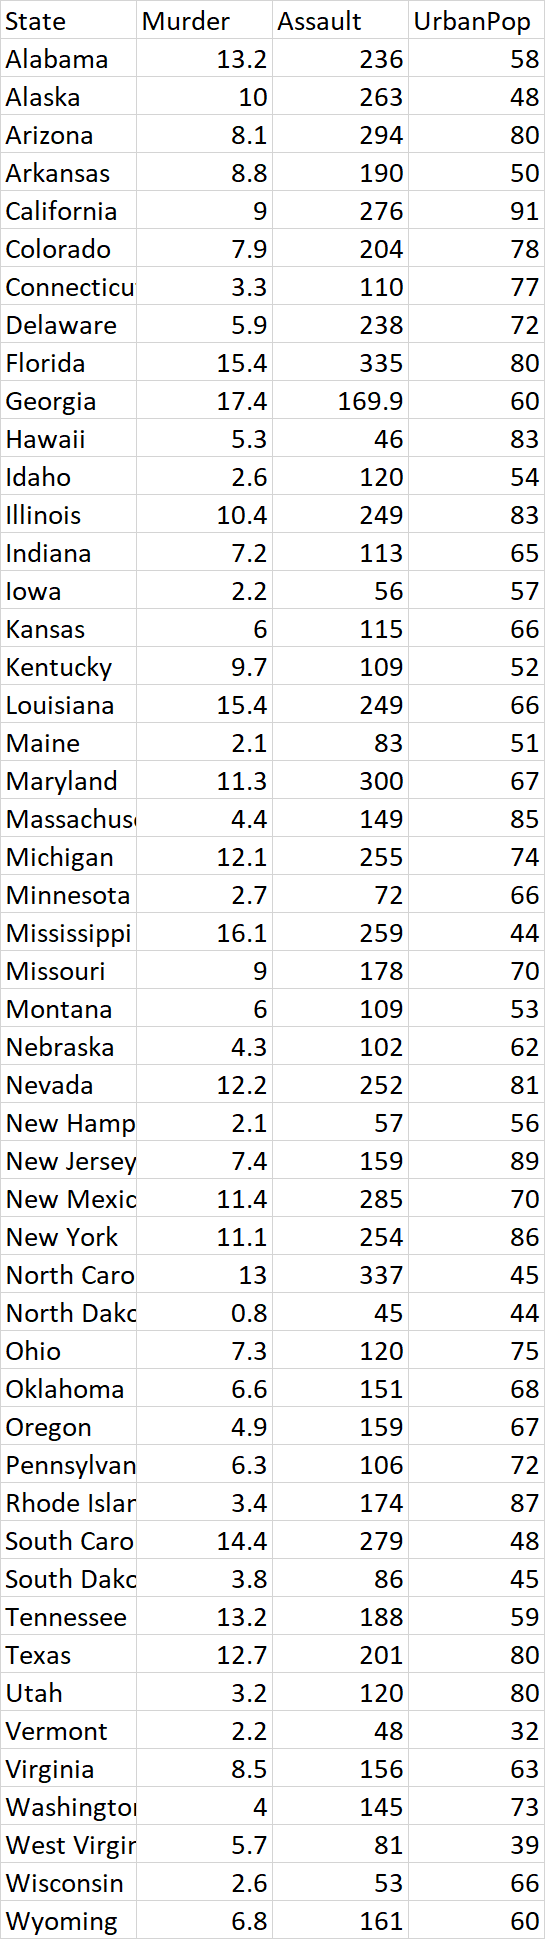

###C. Plot Murder Rates for all 50 States
I created a graph that plots the murder rates per 100,000 residents by state. From this graph, one can see that Georgia has the highest murder rate with 17.4 murders per 100,000 residents, and that North Dakota has the lowest murder rate with 0.8 murders per 100,000 residents.
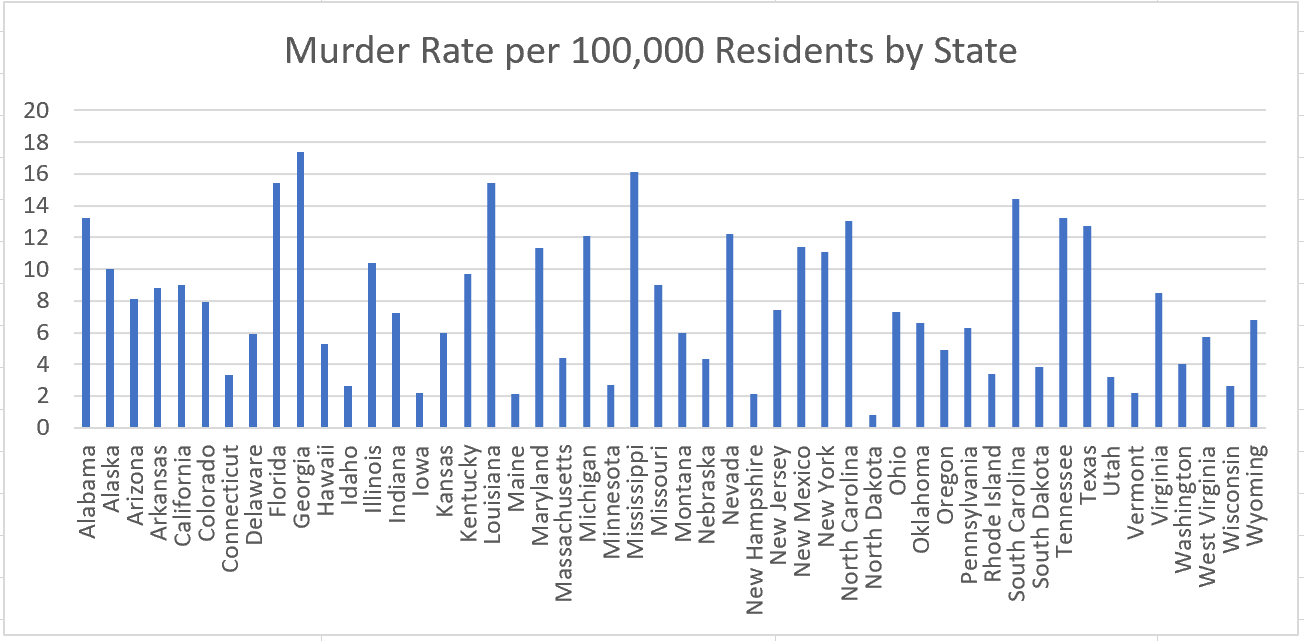

###D. Plot histogram of assaults
I created a histogram of the assaults per 100,000 residents column. Excel automatically rolled the data up, creating four bins: one for assault rates between 45 and 124, inclusive, one for assault rates between 124 and 203, excluding 124, one for assault rates between 203 and 282, excluding 203, and one for assault rates between 282 and 361, excluding 282. From the histogram, one can see that the bin that spanned from 45 to 124 (inclusive) had the highest frequency, meaning that most states are on the lower end of assault rates (at least relative to the other states); one can also see that the bin that spanned from 282 to 361 (exclusive of 282), had the lowest frequency, meaning that states with such a high assault rate are relatively rare.

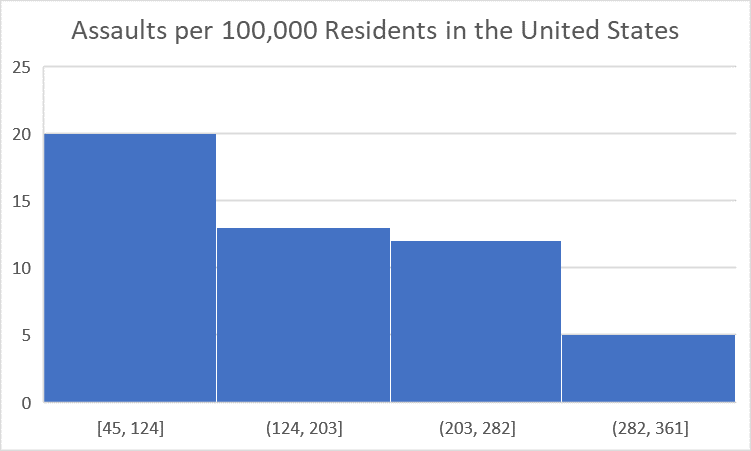

###E. Plot Murder rate vs. Assault rate
I then created another graph that plots the murder rate vs. the assault rate (per 100,000 residents) by state. I chose to use a bar graph because this style of graph allowed for the best visual comparison between the two rates on a per-state basis. From the graph, one can see that the state with the greatest difference between murder rate and assault rate was North Carolina. Its murder rate is 13 per 100,000 residents and its assault rate is 337 per 100,000 residents.
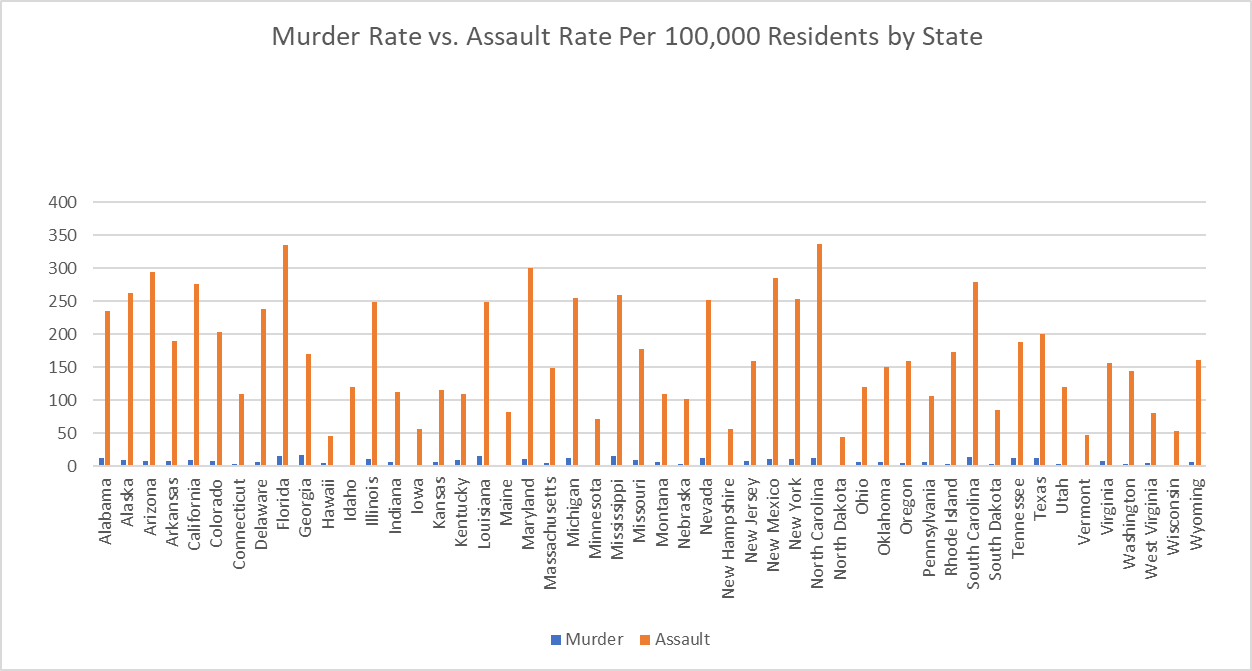

###F. Prepare the dataset to establish a relationship between urban population and crime type
In order to prep the dataset to establish the relationship between urban population and crime type, I binned the data into four groups: small (<50% urban population), medium (<60% urban population), large (<70% urban population), and extra-large (>=70% urban population) (as suggested on the assignment page on Canvas). To represent this discretization, I created a new column beside the original data and binned the states according to the above bins; the states were organized alphabetically within the bins themselves. Here is the final discretized data:
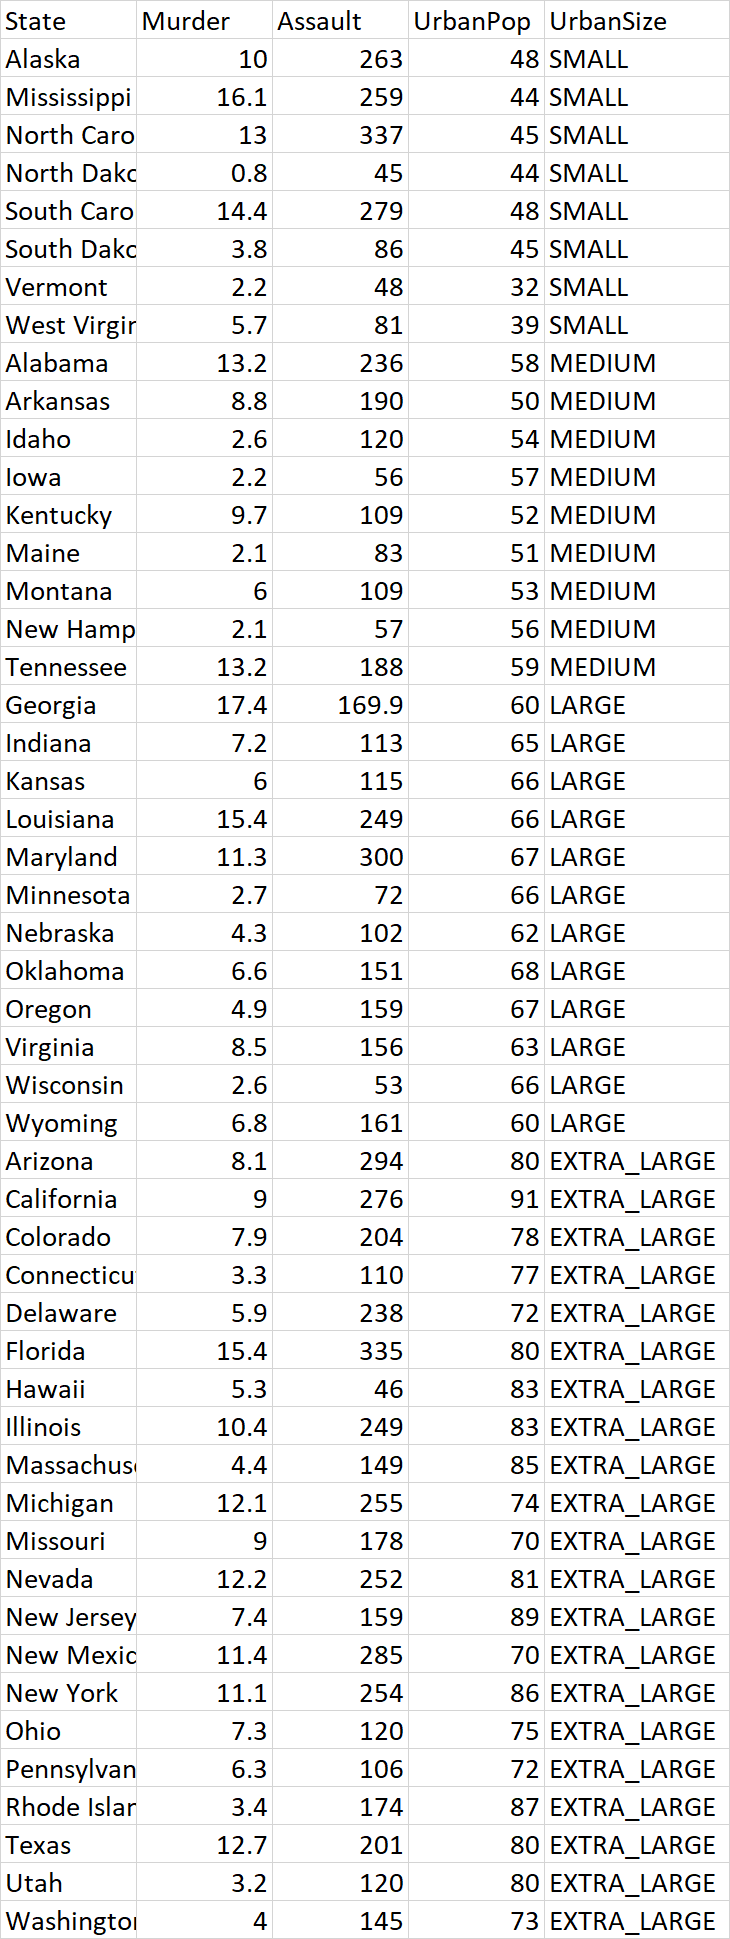

##Problem 1: SQL
###A. Import the original CSV file into SQL and make the table USArrests
I used the online CSV to SQL converter and ended up with this table:
<pre><code>
CREATE TABLE USArrests(
   State    VARCHAR(14),
   Murder   NUMERIC(4,1),
   Assault  NUMERIC(4,1),
   UrbanPop NUMERIC(4,1)
);
</code>
</pre>
Then the converter generated many INSERT commands of the form <br />
<code>
INSERT INTO USArrests(State,Murder,Assault,UrbanPop) VALUES ('Alabama',13.2,236,58);
</code><br />
for all 50 states.
<br /><br />
###B. Imputation in SQL
From working with this data set in Excel, I knew that the Assaults column had a missing value, so I used the SQL command
<pre><code>
update USArrests
set Assault = (select avg(Assault) from USArrests)
where Assault is null;<br />
</code></pre>
to find the missing value in the Assault column and to change that missing value to the average of the Assault column.
<br /><br />
###C. min, max, mean, variance
To find the minumum of each numeric column, I used the following SQL queries: <br />
<pre><code>
select min(Murder) from USArrests;
select min(Assault) from USArrests;
select min(UrbanPop) from USArrests; <br />
</code></pre>
The min for the Murder column was 0.8; the min for the Assault column was 45; the min for the UrbanPop column was 32.
<br /><br />
To find the maximum of each numeric column, I used the following SQL queries: <br />
<pre><code>
select max(Murder) from USArrests;
select max(Assault) from USArrests;
select max(UrbanPop) from USArrests; <br />
</code></pre>
The max for the Murder column was 17.4; the max for the Assault column was 337; the max for the UrbanPop column was 91.
<br /><br />
To find the mean of each numeric column, I used the following SQL queries: <br />
<pre><code>
select avg(Murder) from USArrests;
select avg(Assault) from USArrests;
select avg(UrbanPop) from USArrests; <br />
</code></pre>
The avg for the Murder column was 7.79; the avg for the Assault column was 169.94; the avg for the UrbanPop column was 65.54.
<br /><br />
Finally, to find the variance of each numeric column, I used the following SQL queries: <br />
<pre><code>
select variance(Murder) from USArrests;
select variance(Assault) from USArrests;
select variance(UrbanPop) from USArrests; <br />
</code></pre>
The variance for the Murder column was 18.97; the variance for the Assault column was 6911.44; the variance for the UrbanPop column was 209.52.
<br /><br />
###D. Further SQL Questions
To find which state had the max murder rate, I used the SQL command:
<pre><code>
select State, max(Murder) as "Murder Rate"
from USArrests; <br />
</code></pre>
The command returned:
<pre><code>
State      Murder Rate
Georgia	17.4 <br />
</pre></code>
To find the list of states in ascending order according to Urban Population percentages, I used the following SQL command:
<pre><code>
select State
from USArrests
order by UrbanPop asc; <br />
</code></pre>
The command returned:
<pre><code>
State
Vermont
West Virginia
Mississippi
North Dakota
North Carolina
South Dakota
Alaska
South Carolina
Arkansas
Maine
Kentucky
Montana
Idaho
New Hampshire
Iowa
Alabama
Tennessee
Georgia
Wyoming
Nebraska
Virginia
Indiana
Kansas
Louisiana
Minnesota
Wisconsin
Maryland
Oregon
Oklahoma
Missouri
New Mexico
Delaware
Pennsylvania
Washington
Michigan
Ohio
Connecticut
Colorado
Arizona
Florida
Texas
Utah
Nevada
Hawaii
Illinois
Massachusetts
New York
Rhode Island
New Jersey
California <br />
</code></pre>
To find the number of states with higher murder rates than Arizona, I used  the following SQL command:
<pre><code>
select count(State) as "Number of states with a greater murder rate than Arizona"
from USArrests
where Murder > (select Murder from USArrests where State = "Arizona");<br />
</code></pre>
The command returned:
<pre><code>
Number of states with a greater murder rate than Arizona
21<br />
</code></pre>
To find the list of states with a greater murder rate than Arizona, I used the following SQL command:
<pre><code>
select State
from USArrests
where Murder > (select Murder from USArrests where State = "Arizona");<br />
</code></pre>
The command returned:
<pre><code>
State
Alabama
Alaska
Arkansas
California
Florida
Georgia
Illinois
Kentucky
Louisiana
Maryland
Michigan
Mississippi
Missouri
Nevada
New Mexico
New York
North Carolina
South Carolina
Tennessee
Texas
Virginia<br />
</code></pre>



##Problem 2: Excel
###A. Address missing values
This data set originally had missing values in all three of its numeric columns, and the only data cleansing method that made sense was imputation by mean. So I calculated the mean for each of the numeric columns and filled in each missing value with the mean of its column. This data set also had no noisy values (e.g., outliers, negative numbers) so here is the cleansed data set:
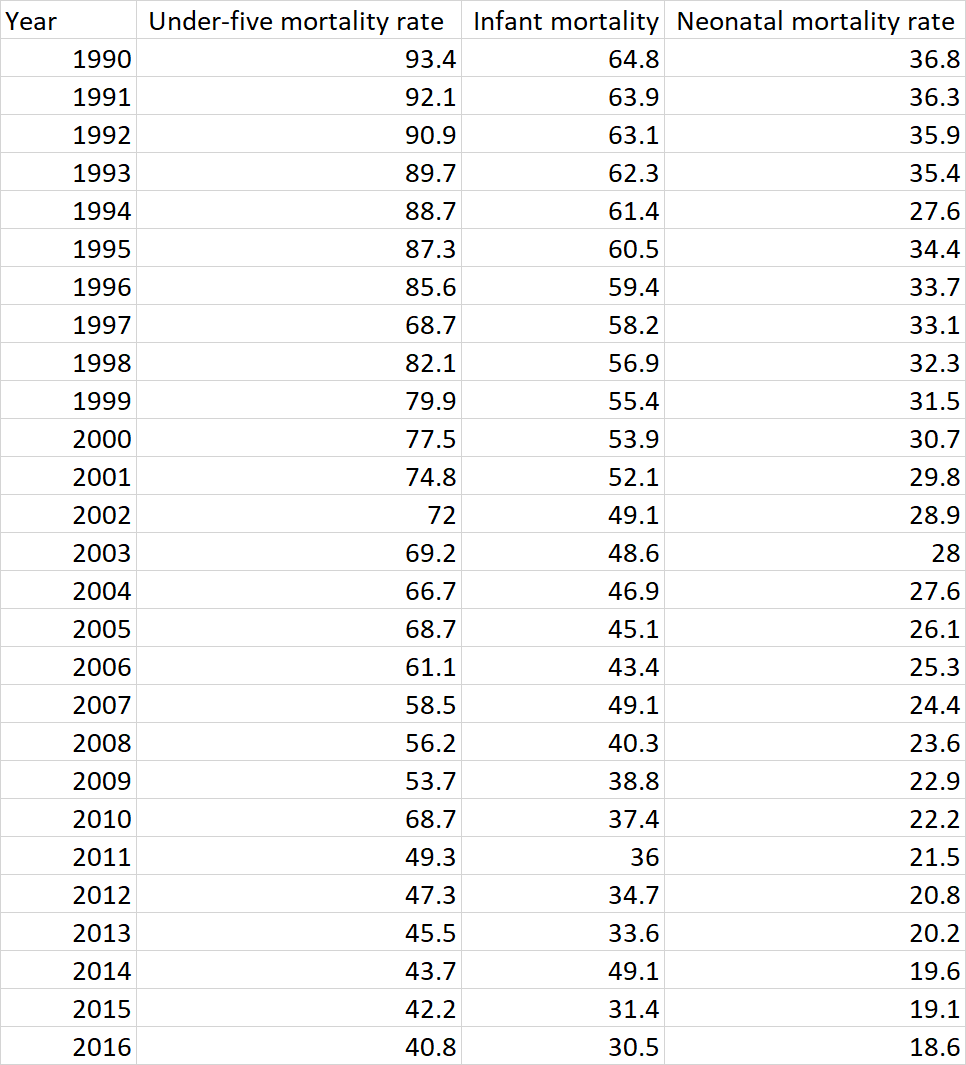

###B. Graphing Relations
I first graphed the under-five mortality rate against the neonatal mortality rate as a bar graph to see the differences between the two rates throughout the specified years. From the graph, one can see that in every year, the under-five mortality rate is higher than the neonatal mortality rate; additionally, one can see that 1994 has the highest disparity between the two rates, with the under-five mortality rate being 61.1 points higher than the neonatal mortality rate.<br />
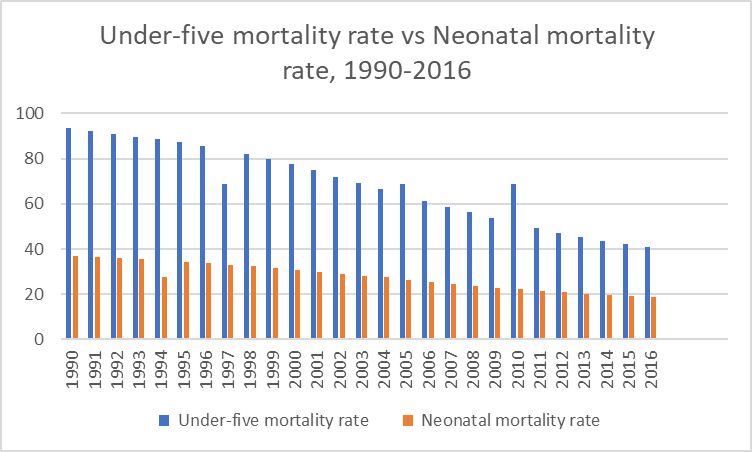 <br />
Next, I graphed the infant mortality rate and the neonatal mortality rate, once again using a bar graph in order to highlight the differences between the two rates over time. From the graph, one can see that the infant mortality rate (during the time in which this data was collected) is always higher than the neonatal mortality rate. Like the above data set, 1994 shows the highest difference between the two rates, with the infant mortality rate being 33.8 points higher than the neonatal mortality rate in that year.
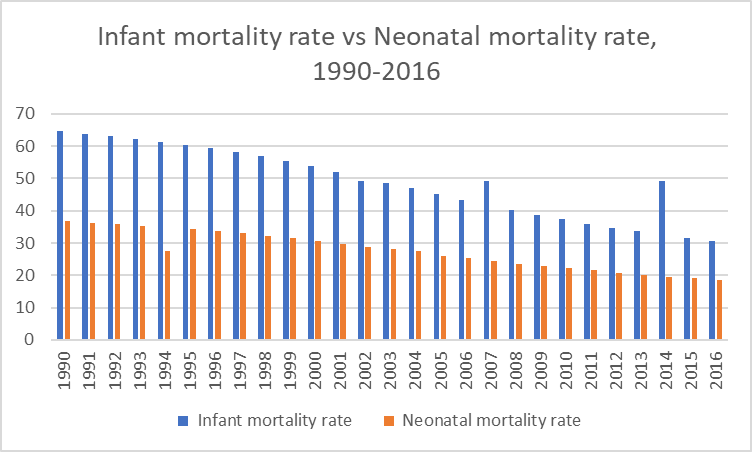<br />
Finally, I graphed the infant mortality rate over the data set's time frame. I decided to use a line graph because this question called for only one of the three rates to be graphed, and a line graph would be best to see how this single value changed over the years. From the graph, one can see that the infant mortality rate has generally gone down from 1990-2016. There are two noticable spikes in 2007 and 2014, but this is simply due to the fact that I imputed the missing values in those years by mean.<br />
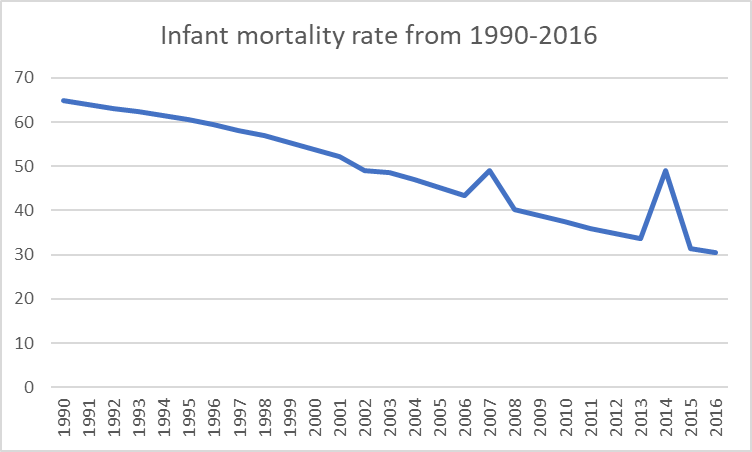

##Problem 2: SQL
###A. Convert data set to SQL
I used the online converter to convert the data set (originally in CSV) to SQL and used this code to make the table MortalityRates:
<pre><code>
CREATE TABLE MortalityRates(
   Year                    INTEGER,
   Underﬁve_mortality_rate NUMERIC(5,1),
   Infant_mortality_rate   NUMERIC(5,1),
   Neonatal_mortality_rate NUMERIC(5,1)
);
<br /></code></pre>
###B. Use SQL to fill in the missing values using medians
Each column has missing values, so I used the following SQL commands to impute by the median:
<pre><code>
update MortalityRates
set Underﬁve_mortality_rate = (select median(Underﬁve_mortality_rate) from MortalityRates)
where Underﬁve_mortality_rate is null;

update MortalityRates
set Infant_mortality_rate = (select median(Infant_mortality_rate) from MortalityRates)
where Infant_mortality_rate is null;

update MortalityRates
set Neonatal_mortality_rate = (select median(Neonatal_mortality_rate) from MortalityRates)
where Neonatal_mortality_rate is null; <br />
</code></pre>
###C. Additional SQL questions
To display the entire table, I used the following SQL query:
<pre><code>
select *
from MortalityRates;<br />
</code></pre>
To find the minimum and maximum infant mortality years, I used the following SQL queries:
<pre><code>
select Year, min(Infant_mortality_rate) as "Minimum Infant Mortality Rate"
from MortalityRates;

select Year, max(Infant_mortality_rate) as "Maximum Infant Mortality Rate"
from MortalityRates;<br />
</code></pre>
From these queries, I found that 1990 had the highest infant mortality rate with 64.8 and 2016 had the lowest infant mortality rate with 30.5.<br /><br />
To find the years that had a higher than average neonatal mortality rate, I used the following SQL query:
<pre><code>
select Year
from MortalityRates
where Neonatal_mortality_rate > (select avg(Neonatal_mortality_rate) from MortalityRates);<br />
</code></pre>
From this query, I found that 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, and 2004 all have higher than average neonatal mortality rates.<br /><br />
To display the sorted infant mortality rates in descending order, I used the following SQL query:
<pre><code>
select Infant_mortality_rate
from MortalityRates
order by Infant_mortality_rate desc;<br />
</code></pre>
The query returned:
<pre><code>
Infant_mortality_rate
64.8
63.9
63.1
62.3
61.4
60.5
59.4
58.2
56.9
55.4
53.9
52.1
50.35
50.35
50.35
48.6
46.9
45.1
43.4
40.3
38.8
37.4
36
34.7
33.6
31.4
30.5<br />
</code></pre>
<br /><br />
To find the min, max, mean, variance, and standard deviation for each column, I used the following SQL queries:
<pre><code>
select min(Underﬁve_mortality_rate), max(Underﬁve_mortality_rate), avg(Underﬁve_mortality_rate), variance(Underﬁve_mortality_rate), stdev(Underﬁve_mortality_rate)
from MortalityRates;

select min(Infant_mortality_rate), max(Infant_mortality_rate), avg(Infant_mortality_rate), variance(Infant_mortality_rate), stdev(Infant_mortality_rate)
from MortalityRates;

select min(Neonatal_mortality_rate), max(Neonatal_mortality_rate), avg(Neonatal_mortality_rate), variance(Neonatal_mortality_rate), stdev(Neonatal_mortality_rate)
from MortalityRates;<br />
</code></pre>
The queries returned the following results:
<pre><code>
For Under Five Mortality Rate:
Min: 40.8	Max: 93.4	Mean: 68.9	Variance: 291.9	Std. Dev.: 17.1

For Infant Mortality Rate:
Min: 30.5	Max: 64.8	Mean: 49.2	Variance: 119.04	Std. Dev.: 10.9

For Neonatal Mortality Rate:
Min: 18.6	Max: 36.8	Mean: 27.7	Variance: 34.5	Std. Dev.: 5.9<br />
</code></pre>
<br /><br />
To add the Above-Five Mortality column, I used the following SQL command:
<pre><code>
alter table MortalityRates
add Above_Five_Mortality_Rate numeric(5,1);<br />
</code></pre>
I decided to impute the Above-Five column with the Under-Five column's median; since Under-Five is the closest age group to the Above-Five column, it made the most sense to use its data to impute the new column. In order to perform this imputation, I used the following SQL command:
<pre><code>
update MortalityRates
set Above_Five_Mortality_Rate = (select median(Underﬁve_mortality_rate) from MortalityRates);<br />
</code></pre>
Finally, to display the entire table again, I used the following SQL command:
<pre><code>
select *
from MortalityRates;<br />
</code></pre>

##XML/JSON Conversions
To convert the cleansed mortality dataset to XML and JSON, I first converted the cleansed SQL to CSV using the SQL to CSV online converter, and then I used the other features on the original CSV to SQL website to convert to both XML and JSON. Both files are included in the HW2 folder on GitHub.